In [1]:
import yfinance as yf

msft = yf.Ticker("MSFT")
aapl_historical = msft.history(start="2020-06-02", end="2020-07-07")

aapl_historical

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-01,177.996674,178.445232,176.943568,178.279465,22622400,0,0
2020-06-02,179.664117,180.395450,176.836302,180.307693,30794600,0,0
2020-06-03,180.219922,181.312041,179.010780,180.746475,27311000,0,0
2020-06-04,179.712860,181.214524,177.762639,178.367203,28761800,0,0
2020-06-05,178.074687,183.057503,177.479869,182.540695,39893600,0,0
2020-06-08,181.312018,183.857057,179.849353,183.671783,33211600,0,0
2020-06-09,183.320772,185.953567,182.599185,185.075974,29783900,0,0
2020-06-10,186.372877,193.578944,186.255854,191.940750,43872300,0,0
2020-06-11,188.323093,190.887624,181.438816,181.633835,52854700,0,0


In [2]:
data = yf.download("AMZN AAPL GOOG ^GSPC", start="2017-01-01", end="2018-01-01")
def df(data,pm):
    df=data[pm]
    return df
data=df(data,"Close")
data

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,^GSPC
Date,,,,
2017-01-03,29.037500,37.683498,39.306999,2257.830078
2017-01-04,29.004999,37.859001,39.345001,2270.750000
2017-01-05,29.152500,39.022499,39.701000,2269.000000
2017-01-06,29.477501,39.799500,40.307499,2276.979980
2017-01-09,29.747499,39.846001,40.332500,2268.899902
...,...,...,...,...
2017-12-22,43.752499,58.417999,53.006001,2683.340088
2017-12-26,42.642502,58.838001,52.837002,2680.500000
2017-12-27,42.650002,59.112999,52.468498,2682.620117


In [3]:
# Normalize stock data based on initial price
def normalize(data):
  x = data.copy()
  for i in x.columns[0:]:
    x[i] = x[i]/x[i][0]
  return x
normalize(data)
import plotly.express as px
# Function to plot interactive plot
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[0:]:
    fig.add_scatter(x = df.index, y = df[i], name = i)
  fig.show()

In [4]:
interactive_plot(normalize(data), 'Normalized Prices')

In [5]:
def daily_return(df):
    df_daily_return = df.copy()
    df_daily_return=df_daily_return.pct_change()
    for i in df.columns[0:].tolist():
        df_daily_return[i][0] = 0
    return df_daily_return


In [6]:
stocks_daily_return = daily_return(data)
stocks_daily_return

,AAPL,AMZN,GOOG,^GSPC
Date,,,,
2017-01-03,0.000000,0.000000,0.000000,0.000000
2017-01-04,-0.001119,0.004657,0.000967,0.005722
2017-01-05,0.005085,0.030732,0.009048,-0.000771
2017-01-06,0.011148,0.019912,0.015277,0.003517
2017-01-09,0.009159,0.001168,0.000620,-0.003549
...,...,...,...,...
2017-12-22,0.000000,-0.005448,-0.003300,-0.000458
2017-12-26,-0.025370,0.007190,-0.003188,-0.001058
2017-12-27,0.000176,0.004674,-0.006974,0.000791


In [7]:
interactive_plot(stocks_daily_return, 'Stocks daily returns')

In [8]:
import numpy as np
beta, alpha = np.polyfit(stocks_daily_return['^GSPC'], stocks_daily_return['AAPL'], 1)
beta


1.3929799878694449

In [9]:
(stocks_daily_return["^GSPC"].mean()*252)*beta

0.23952732381550912

In [10]:
rm = stocks_daily_return['^GSPC'].mean() * 252
rf = 0 
ER_AAPL = rf + (beta * (rm-rf)) 
ER_AAPL

0.23952732381550912

In [11]:
beta = {}
alpha = {}
import matplotlib.pyplot as plt

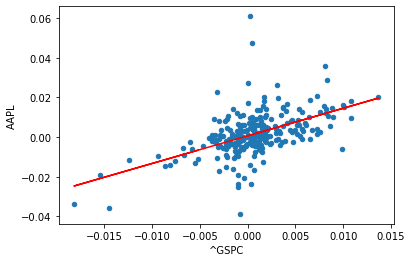

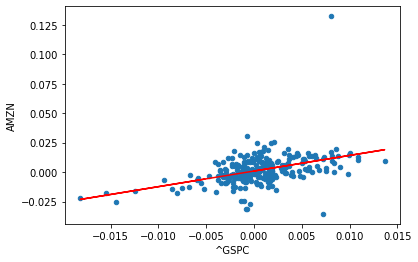

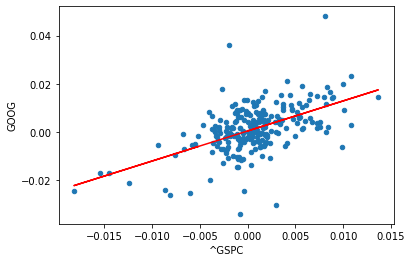

{'AAPL': 1.3929799878694449,
 'AMZN': 1.3238905280446664,
 'GOOG': 1.2499008778488752}

In [12]:
for i in stocks_daily_return.columns:
  if i != 'Date' and i != '^GSPC':
    stocks_daily_return.plot(kind = 'scatter', x = '^GSPC', y = i)
    b, a = np.polyfit(stocks_daily_return['^GSPC'], stocks_daily_return[i], 1)
    plt.plot(stocks_daily_return['^GSPC'], b * stocks_daily_return['^GSPC'] + a, '-', color = 'r')  
    beta[i] = b    
    alpha[i] = a  
    plt.show()
beta

In [13]:
keys = list(beta.keys())
beta

{'AAPL': 1.3929799878694449,
 'AMZN': 1.3238905280446664,
 'GOOG': 1.2499008778488752}

In [14]:
ER = {}

rf = 0 
rm = stocks_daily_return['^GSPC'].mean() * 252 
rm

0.17195316939324076

In [15]:
for i in keys:
  ER[i] = rf + (beta[i] * (rm-rf)) 


In [16]:
portfolio_weights = 1/(len(ER)) * np.ones(len(ER)) 
ER_portfolio = sum(list(ER.values()) * portfolio_weights)
ER_portfolio

0.22736630447199618

Capital Market Line

Efficient Frontier

In [17]:
def daily_return(df):
    df_daily_return = df.copy()
    df_daily_return=df_daily_return.pct_change()
    for i in df.columns[0:].tolist():
        df_daily_return[i][0] = 0
    return df_daily_return

In [18]:
stocks_daily_return=daily_return(data)

In [19]:

import pandas as pd


In [20]:
cov=stocks_daily_return.iloc[:,:3].cov()*252

cov

,AAPL,AMZN,GOOG
AAPL,0.031243,0.018940,0.013332
AMZN,0.018940,0.043947,0.021530
GOOG,0.013332,0.021530,0.023597


In [21]:
n_assets = 3
n_portfolios = 1000
mean_variance_pairs=[]
#-- Initialize empty list to store mean-variance pairs for plotting
weights_list=[]
np.random.seed(75)
#-- Loop through and generate lots of random portfolios
for i in range(n_portfolios):
    asset_list=[]
    #- Choose assets randomly without replacement
    assets = np.random.choice(list(stocks_daily_return.columns[:3]), n_assets, replace=False)
    #- Choose weights randomly
    weights = np.random.rand(n_assets)
    #- Ensure weights sum to 1
    weights = weights/sum(weights)
    #-- Loop over asset pairs and compute portfolio return and variance
    #- https://quant.stackexchange.com/questions/43442/portfolio-variance-explanation-for-equation-investments-by-zvi-bodie
    portfolio_E_Variance = 0
    portfolio_E_Return = 0
    for i in range(len(assets)):
        portfolio_E_Return += weights[i] * ER[assets[i]]
        for j in range(len(assets)):
            #-- Add variance/covariance for each asset pair
            #- Note that when i==j this adds the variance
            portfolio_E_Variance += weights[i] * weights[j] * cov.loc[assets[i], assets[j]]
    for t in range(len(weights.tolist())): asset_list.append(str((assets.tolist())[t])+":"+str(round(weights.tolist()[t],2)))
    weights_list.append(" ".join(asset_list))
    #-- Add the mean/variance pairs to a list for plotting
    mean_variance_pairs.append([portfolio_E_Return,portfolio_E_Variance])
    mean_variance_pairs1={"return":portfolio_E_Return,"varince": portfolio_E_Variance,"assets":weights_list}


In [22]:
import plotly.graph_objects as go
#-- Plot the risk vs. return of randomly generated portfolios
#- Convert the list from before into an array for easy plotting
mean_variance_pairs1 = pd.DataFrame(data=mean_variance_pairs1)
mean_variance_pairs = np.array(mean_variance_pairs)
risk_free_rate=0 #-- Include risk free rate here for sharpe ratio
mean_variance_pairs
#-- Create Plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=mean_variance_pairs[:,1]**0.5, 
                         y=mean_variance_pairs[:,0], 
                         text=mean_variance_pairs1.iloc[:,2] ,
                      #- Add color scale for sharpe ratio   
                      marker=dict(color=(mean_variance_pairs[:,0]-risk_free_rate)/(mean_variance_pairs[:,1]**0.5), 
                                  showscale=True, 
                                  size=7,
                                  line=dict(width=1),
                                  colorscale="RdBu",
                                  colorbar=dict(title="Sharpe<br>Ratio")
                                 ), 
                      mode='markers'))
#- Add title/labels
fig.update_layout(template='plotly_white',
                  xaxis=dict(title='Annualised Risk (Volatility)'),
                  yaxis=dict(title='Annualised Return'),
                  title='Sample of Random Portfolios',
                  coloraxis_colorbar=dict(title="Sharpe Ratio"))

In [23]:
n_assets = 3
from tqdm import tqdm
mean_variance_pairs = []
#-- Store weights and tickers for labelling
weights_list=[]
tickers_list=[]
weights1_list=[]
for i in tqdm(range(1000)):
    next_i = False
    while True:
        asset_list=[]
        #- Choose assets randomly without replacement
        assets = np.random.choice(list(stocks_daily_return.columns[:3]), n_assets, replace=False)
        #- Choose weights randomly ensuring they sum to one
        weights = np.random.rand(n_assets)
        weights = weights/sum(weights)

        #-- Loop over asset pairs and compute portfolio return and variance
        portfolio_E_Variance = 0
        portfolio_E_Return = 0
        for i in range(len(assets)):
            portfolio_E_Return += weights[i] * ER[assets[i]]
            for j in range(len(assets)):
                portfolio_E_Variance += weights[i] * weights[j] * cov.loc[assets[i], assets[j]]
        for t in range(len(weights.tolist())): asset_list.append(str((assets.tolist())[t])+":"+str(round(weights.tolist()[t],2)))
        weights1_list.append(" ".join(asset_list))
        #-- Skip over dominated portfolios
        for R,V in mean_variance_pairs:
            if (R > portfolio_E_Return) & (V < portfolio_E_Variance):
                next_i = True
                break
        if next_i:
            break
        mean_variance_pairs1={"return":portfolio_E_Return,"varince": portfolio_E_Variance,"assets":weights1_list}
        #-- Add the mean/variance pairs to a list for plotting
        mean_variance_pairs.append([portfolio_E_Return, portfolio_E_Variance])
        weights_list.append(weights)
        tickers_list.append(assets)
        break

100%|██████████| 1000/1000 [00:00<00:00, 3017.56it/s]


In [24]:
import plotly.graph_objects as go
#-- Plot the risk vs. return of randomly generated portfolios
#- Convert the list from before into an array for easy plotting
mean_variance_pairs = np.array(mean_variance_pairs)
risk_free_rate=0 #-- Include risk free rate here for sharpe ratio
mean_variance_pairs1 = pd.DataFrame(data=mean_variance_pairs1)
#-- Create Plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=mean_variance_pairs[:,1]**0.5, 
                         y=mean_variance_pairs[:,0], 
                         text=mean_variance_pairs1.iloc[:,2] ,
                      #- Add color scale for sharpe ratio   
                      marker=dict(color=(mean_variance_pairs[:,0]-risk_free_rate)/(mean_variance_pairs[:,1]**0.5), 
                                  showscale=True, 
                                  size=7,
                                  line=dict(width=1),
                                  colorscale="RdBu",
                                  colorbar=dict(title="Sharpe<br>Ratio")
                                 ), 
                      mode='markers'))
#- Add title/labels
fig.update_layout(template='plotly_white',
                  xaxis=dict(title='Annualised Risk (Volatility)'),
                  yaxis=dict(title='Annualised Return'),
                  title='Sample of Random Portfolios',
                  coloraxis_colorbar=dict(title="Sharpe Ratio"))

: 